In [9]:
import pandas as pd
import xmltodict
input_path = './data/apple_health_export/export.xml'

with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())
    


In [10]:
records_list = input_data['HealthData']['Record']

In [11]:
df = pd.DataFrame(records_list)

In [12]:
df.columns

Index(['@type', '@sourceName', '@sourceVersion', '@unit', '@creationDate',
       '@startDate', '@endDate', '@value', 'MetadataEntry', '@device',
       'HeartRateVariabilityMetadataList'],
      dtype='object')

In [13]:
df['@type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierSixMinuteWalkTestDistance',
       'HKQuantityTypeIdentifierAppleStandTime',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIdentifierWalkingStepLength',
       'HKQuant

In [14]:

format = '%Y-%m-%d %H:%M:%S %z'
df['@creationDate'] = pd.to_datetime(df['@creationDate'],
                                     format=format)
df['@creationDateOnly'] = df['@creationDate'].dt.date
df['@startDate'] = pd.to_datetime(df['@startDate'],
                                  format=format)
df['@endDate'] = pd.to_datetime(df['@endDate'],
                                format=format)
df['@startDateOnly'] = df['@startDate'].dt.date

df = df[df['@startDateOnly'] > pd.to_datetime('2020-02-13')]
standtime = df[(df['@type'] == 'HKQuantityTypeIdentifierAppleStandTime')]

In [15]:
standtime.loc[:, '@value'] = pd.to_numeric(
    standtime.loc[:, '@value'])

In [16]:
standtime.dtypes

@type                                                               object
@sourceName                                                         object
@sourceVersion                                                      object
@unit                                                               object
@creationDate                       datetime64[ns, pytz.FixedOffset(-240)]
@startDate                          datetime64[ns, pytz.FixedOffset(-240)]
@endDate                            datetime64[ns, pytz.FixedOffset(-240)]
@value                                                               int64
MetadataEntry                                                       object
@device                                                             object
HeartRateVariabilityMetadataList                                    object
@creationDateOnly                                                   object
@startDateOnly                                                      object
dtype: object

In [18]:
standtime_by_start = standtime.groupby('@startDateOnly').sum()

In [19]:
standtime_by_start

,@value
@startDateOnly,
2020-02-14,106
2020-02-15,58
2020-02-16,193
2020-02-17,213
2020-02-18,209
...,...
2020-10-21,22
2020-10-22,94
2020-10-23,88


<AxesSubplot:xlabel='@startDateOnly'>

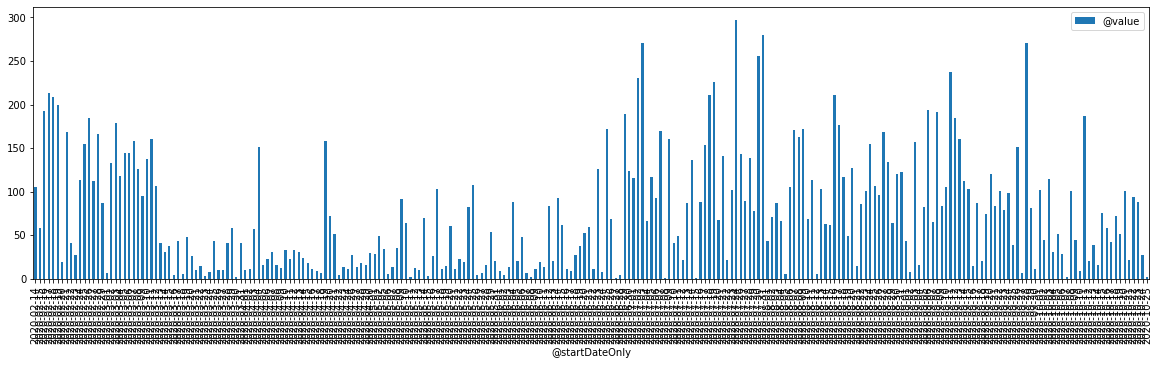

In [20]:
standtime_by_start.plot(kind='bar',figsize=(20,5))

In [21]:
standtime_by_start.to_csv('standtime_by_start_10-25.csv')